#1. Do the height and weight columns have the appropriate data types?
#2. Can you separate the joined column into year, month and day column?
#3. Can you clean and transform the value, wage and release clause columns into columns of integers?
#4. Remove the unnecessary newline characters from all columns that have them?
#5.Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
#6.Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical
#7. Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)


In [37]:
import gdown
import pandas as pd

# Define the Google Drive file id and the url to download the file
file_id = '1qoEa0F0vEFVApajm_yUhU7EuP-5rpMFS'
url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(url, 'myfile.csv', quiet=False)

# Read the file with pandas
df = pd.read_csv('myfile.csv')

# Print the first 5 rows of the dataframe
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1qoEa0F0vEFVApajm_yUhU7EuP-5rpMFS
To: /content/myfile.csv
100%|██████████| 8.43M/8.43M [00:00<00:00, 111MB/s]


       ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33    93   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35    92   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slo

<ipython-input-37-1bb958639981>:12: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('myfile.csv')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

#1. Do the height and weight columns have the appropriate data types?


In [39]:
import pandas as pd

# Assuming DataFrame is named 'df' and the columns are 'Height' and 'Weight'
df['Height'] = df['Height'].str.extract('(\d+)').astype(float)
df['Weight'] = df['Weight'].str.extract('(\d+)').astype(float)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18979 non-null  int64  
 1   Name              18979 non-null  object 
 2   LongName          18979 non-null  object 
 3   photoUrl          18979 non-null  object 
 4   playerUrl         18979 non-null  object 
 5   Nationality       18979 non-null  object 
 6   Age               18979 non-null  int64  
 7   ↓OVA              18979 non-null  int64  
 8   POT               18979 non-null  int64  
 9   Club              18979 non-null  object 
 10  Contract          18979 non-null  object 
 11  Positions         18979 non-null  object 
 12  Height            18979 non-null  float64
 13  Weight            18979 non-null  float64
 14  Preferred Foot    18979 non-null  object 
 15  BOV               18979 non-null  int64  
 16  Best Position     18979 non-null  object

#2. Can you separate the joined column into year, month and day column?

In [40]:
print(df['Joined'])

0         Jul 1, 2004
1        Jul 10, 2018
2        Jul 16, 2014
3        Aug 30, 2015
4         Aug 3, 2017
             ...     
18974    Jul 13, 2018
18975     Aug 1, 2020
18976     Mar 8, 2019
18977    Sep 22, 2020
18978    Jul 29, 2019
Name: Joined, Length: 18979, dtype: object


In [41]:
# Assuming DataFrame is named 'df' and the column is 'Joined'
df['Joined'] = pd.to_datetime(df['Joined'])
df['Year'] = df['Joined'].dt.year
df['Month'] = df['Joined'].dt.strftime('%b')
df['Day'] = df['Joined'].dt.day

df

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Year,Month,Day
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,...,85,92,91,95,38,65,771,2004,Jul,1
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,...,89,93,81,89,35,77,562,2018,Jul,10
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,...,87,92,78,90,52,90,150,2014,Jul,16
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,...,76,86,93,88,64,78,207,2015,Aug,30
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,...,91,85,86,94,36,59,595,2017,Aug,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,64,28,26,38,48,51,NaN,2018,Jul,13
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,64,40,48,49,35,45,NaN,2020,Aug,1
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,63,39,44,46,40,53,NaN,2019,Mar,8
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,58,49,41,49,30,44,NaN,2020,Sep,22


#3. Can you clean and transform the value, wage and release clause columns into columns of float?

In [42]:
df['Value'], df['Wage'], df['Release Clause']

(0        €103.5M
 1           €63M
 2          €120M
 3          €129M
 4          €132M
           ...   
 18974      €100K
 18975      €130K
 18976      €120K
 18977      €100K
 18978      €100K
 Name: Value, Length: 18979, dtype: object,
 0        €560K
 1        €220K
 2        €125K
 3        €370K
 4        €270K
          ...  
 18974      €1K
 18975     €500
 18976     €500
 18977      €2K
 18978      €1K
 Name: Wage, Length: 18979, dtype: object,
 0        €138.4M
 1         €75.9M
 2        €159.4M
 3          €161M
 4        €166.5M
           ...   
 18974       €70K
 18975      €165K
 18976      €131K
 18977       €88K
 18978       €79K
 Name: Release Clause, Length: 18979, dtype: object)

In [43]:
def clean_and_transform_value(value):
    value = value.replace('€', '')  # Remove '€' symbol

    if value.endswith('M'):
        value = value[:-1]  # Remove 'M' suffix
        return float(value) * 1000000
    elif value.endswith('K'):
        value = value[:-1]  # Remove 'K' suffix
        return float(value) * 1000
    else:
        return float(value)

df['Value'] = df['Value'].apply(lambda x: clean_and_transform_value(x))
df['Wage'] = df['Wage'].apply(lambda x: clean_and_transform_value(x))
df['Release Clause'] = df['Release Clause'].apply(lambda x: clean_and_transform_value(x))


In [44]:
# Select the desired columns
selected_columns = df[['Value', 'Wage', 'Release Clause']]
selected_columns

,Value,Wage,Release Clause
0,103500000.0,560000.0,138400000.0
1,63000000.0,220000.0,75900000.0
2,120000000.0,125000.0,159400000.0
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166500000.0
...,...,...,...
18974,100000.0,1000.0,70000.0
18975,130000.0,500.0,165000.0
18976,120000.0,500.0,131000.0
18977,100000.0,2000.0,88000.0


#4.Remove the unnecessary newline characters from all columns that have them.

In [45]:
# Remove newline characters from all columns
df = df.replace(r'\n', '', regex=True)

#5. Based on the 'Joined' column, check which players have been playing at a club for more than 10 years?

In [46]:
# Calculate the number of years a player has been at the club
df['Years_at_Club'] = pd.to_datetime('today') - df['Joined']
df['Years_at_Club'] = round((df['Years_at_Club'].dt.days / 365.25),2)

# Filter players who have been at the club for more than 10 years
players_over_10_years = df[df['Years_at_Club'] > 10][['Name', 'Years_at_Club']]

# Display the players and their joining year
print(players_over_10_years)

                Name  Years_at_Club
0           L. Messi          19.01
14          M. Neuer          12.01
15        K. Benzema          13.98
16      Sergio Ramos          17.92
17         S. Agüero          11.93
...              ...            ...
17186     Yao Hanlin          13.50
17258    Chang Feiya          10.50
17500   O. Al Sunain          10.01
17863     Sun Shoubo          10.38
18416  B. Al Bahrani          10.01

[628 rows x 2 columns]


# 6. Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical

In [47]:
Star_column = df[['W/F','SM','IR']]
Star_column

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★
...,...,...,...
18974,2 ★,2★,1 ★
18975,2 ★,2★,1 ★
18976,2 ★,2★,1 ★
18977,3 ★,2★,1 ★


In [48]:
# Remove star characters and convert to numerical data type
df['W/F'] = df['W/F'].str.replace('[★]', '', regex=True).astype(float)
df['SM'] = df['SM'].str.replace('[★]', '', regex=True).astype(float)
df['IR'] = df['IR'].str.replace('[★]', '', regex=True).astype(float)

Star_column = df[['W/F','SM','IR']]
Star_column

,W/F,SM,IR
0,4.0,4.0,5.0
1,4.0,5.0,5.0
2,3.0,1.0,3.0
3,5.0,4.0,4.0
4,5.0,5.0,5.0
...,...,...,...
18974,2.0,2.0,1.0
18975,2.0,2.0,1.0
18976,2.0,2.0,1.0
18977,3.0,2.0,1.0


# 6. Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)


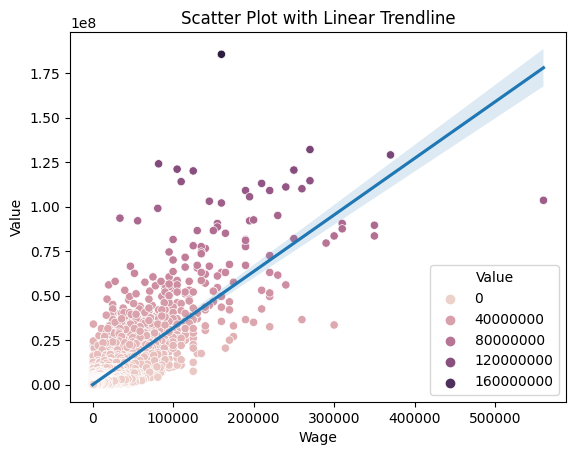

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='Wage', y='Value', hue='Value')
sns.regplot(data=df, x='Wage', y='Value', scatter=False)
plt.title('Scatter Plot with Linear Trendline')
plt.show()


The trendline equation represents the expected relationship between wage and value. Players appearing above this line are considered highly valuable but may be earning lower wages than expected.

In [52]:
# Export it to a CSV file named 'output.csv'
df.to_csv('output.csv', index=False)

In [53]:
from google.colab import files

# Tải tệp tin 'output.csv'
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>